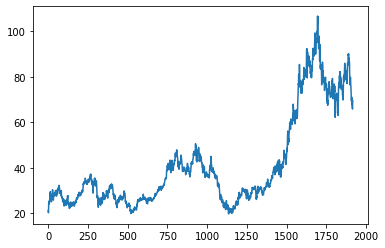

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
origin_dataset_test = pd.read_csv('dataset_Original/JD.csv')
real_stock_price = origin_dataset_test['Open'].values
real_stock_price_part = real_stock_price[len(real_stock_price)-200:len(real_stock_price)]
plt.plot(real_stock_price)
plt.show()

获取某路径内所有CSV格式文件的数据量  
  做毕设的时候用来统计数据量

In [10]:
import os
import pandas as pd
FILEPATH = 'dataset_origin/NYSE/'


def get_line_num(file_name):
    with open(FILEPATH+file_name, 'r') as f:
        line_num = len(f.readlines())-1
    print(file_name + ' ' + str(line_num))


for name in os.listdir(FILEPATH):
    get_line_num(name)


USFR.csv 2061


将某路径内的文件全部打包为.zip

In [2]:
import os
import zipfile


def zip_path(path):
    zip_file = zipfile.ZipFile(path + '.zip', 'w', zipfile.ZIP_DEFLATED)
    for root, dirs, files in os.walk(path):
        for file in files:
            zip_file.write(os.path.join(root, file))
    zip_file.close()


zip_path('small')



In [2]:
# 图片化
from My_LSTM_Training import My_LSTM_Training
import os
def predict_multi(file):
    real_stock_price, predicted_stock_price = myModel.model_predict(model_name='train_set_test.h5', data_predict=file, timestep=64, predict_days=50)
    myModel.visualising(real_stock_price, predicted_stock_price, True)


Timestep = 64
DATA_PATH = 'dataset_origin/CN/'
MODEL_PATH = 'trained_models/'
PIC_PATH = 'predict_pic/CN/'
myModel = My_LSTM_Training(Timestep, DATA_PATH, MODEL_PATH, PIC_PATH)
for name in os.listdir(DATA_PATH):
    predict_multi(name)

<Figure size 576x432 with 0 Axes>

In [7]:
from My_LSTM_Training import My_LSTM_Training
from sklearn.preprocessing import MinMaxScaler
import os
import oss2
auth = oss2.Auth('LTAI5tHB9mSTZC2H5EeFXddF', 'vDcyTNuyYTL6WGdiGYTeJ6H7kADw99')
bucket = oss2.Bucket(auth, 'oss-cn-shanghai.aliyuncs.com', 'dataset-yhy')

Timestep = 64
DATA_PATH = 'dataset_origin/NASDAQ/large/'
MODEL_PATH = 'trained_models/NASDAQ/'
PIC_PATH = 'predict_pic/self/NASDAQ/'
myModel = My_LSTM_Training(Timestep, DATA_PATH, MODEL_PATH, PIC_PATH)

def train(data_file):
    
    x_train, y_train, x_test, y_test = myModel.init_dataset(data_file)
    # myModel.modelTrain(x_train, y_train, batch_size=40, name=data_file[:-4]+'.h5')
    from keras.models import load_model
    model = load_model('trained_models/NASDAQ/large/PYPL.h5')
    predictions = model.predict(x_test)
    scaler = MinMaxScaler(feature_range=(0, 1))

    predictions = scaler.inverse_transform(predictions)
    real_stock_price = scaler.inverse_transform(y_test)


# for name in os.listdir(DATA_PATH):
#     train(name)
#     bucket.put_object_from_file(MODEL_PATH + name[:-4] + '.h5', MODEL_PATH + name[:-4] + '.h5')
train('PYPL.csv')


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [6]:
import tushare as ts

pro = ts.pro_api('711feb83aee69bfac89a056c9d77b9776a61dd306222bddb9b9d09f7')
df = pro.daily(ts_code='000001.SZ' ,start_date='19000101', end_date='20221231')
df


,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20220418,16.15,16.20,15.81,15.90,16.42,-0.52,-3.1669,1086887.56,1.734237e+06
1,000001.SZ,20220415,15.90,16.53,15.86,16.42,16.04,0.38,2.3691,1231761.03,2.014010e+06
2,000001.SZ,20220414,16.00,16.25,15.92,16.04,15.80,0.24,1.5190,929614.94,1.493344e+06
3,000001.SZ,20220413,15.89,16.08,15.72,15.80,15.92,-0.12,-0.7538,890628.06,1.415496e+06
4,000001.SZ,20220412,16.05,16.26,15.66,15.92,16.05,-0.13,-0.8100,1039261.42,1.654820e+06
...,...,...,...,...,...,...,...,...,...,...,...
4995,000001.SZ,20010109,14.00,14.58,13.85,14.55,14.00,0.55,3.9300,52336.37,7.434435e+04
4996,000001.SZ,20010108,14.20,14.20,13.98,14.00,14.20,-0.20,-1.4100,69944.94,9.804406e+04
4997,000001.SZ,20010105,14.33,14.33,14.12,14.20,14.35,-0.15,-1.0500,66419.01,9.415481e+04
4998,000001.SZ,20010104,14.45,14.50,14.30,14.35,14.44,-0.09,-0.6200,48404.44,6.957336e+04
